<a href="https://colab.research.google.com/github/zhaishu2008/UTS_ML2019_ID12450108/blob/master/SVM_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# encoding: utf-8

Step 1: Import required packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline
import cv2
import seaborn as sns # This pacakge is used for better visualization of data (e.g confusion matrix)

## **Connect to My Drive**



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
cd /content/gdrive/My Drive/data/assessment !

/content/gdrive/My Drive/data/assessment !


In [0]:
ls

 ANN.ipynb
 gradient_data
'Handcrafted Feature Extraction_ Part-1.ipynb'
'Handcrafted Feature Extraction_ Part-1-Solution.ipynb'
'Handcrafted Feature Extraction_ Part-2-Solution.ipynb'
 KNN-HOG.ipynb
 knn-LBP.ipynb
 LogisticRegression-NeuralNetwork-Part-1-Solution.ipynb
 Mnist/
'Python-additional-warmup-solution(1).ipynb'
 SVM-HOG.ipynb
 SVM-LBP.ipynb
 t10k-images-idx3-ubyte/
 t10k-images-idx3-ubyte.gz
 t10k-labels-idx1-ubyte/
 t10k-labels-idx1-ubyte.gz
 train-images-idx3-ubyte/
 train-images-idx3-ubyte.gz
 train-labels-idx1-ubyte/
 train-labels-idx1-ubyte.gz
 Week3-Lab2-EdgeDetection-Solution.ipynb
 Week3-Lab2-MachineLearning-Solution.ipynb
 Week5-LogisticRegression-NeuralNetwork-Part-2-Solution.ipynb
'Week6-ConvolutionalNeuralNetworks(CNNs)-Solution.ipynb'


Use the utility function to load the dataset and split it into train and test.

In [0]:
X_train, y_train = load_mnist('/content/gdrive/My Drive/data/assessment !', kind='train')
X_test, y_test = load_mnist('/content/gdrive/My Drive/data/assessment !', kind='t10k')
# initialize the label names from Fashion MNIST github repository

labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [0]:
np.shape(X_train)
np.shape(X_test)

(10000, 784)

Reshaping the feature vector back into the 28X28 image

In [0]:
X_train=X_train.reshape(-1,28,28)
X_test=X_test.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


Visualization of Dataset

top
trouser
sneaker
dress


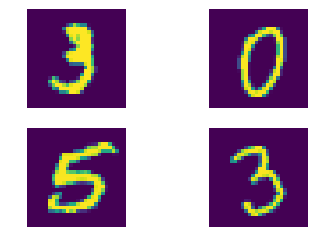

In [0]:
# view few images and print its corresponding label
img_index = 10
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 1000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,3)
ax2.axis('off')
img_index = 20000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(2,2,4)
ax2.axis('off')
img_index = 30000
ax2.imshow(X_train[img_index])
print(labelNames[y_train[img_index]])

Histogram-of-Oriented Gradient (HOG) feature extraction


In [0]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features
  image = (X_train[img_index])
  #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  H = feature.hog(image, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
 
  # update the data and labels
  data_train.append(H)
  labels_train.append(y_train[img_index])

print(np.shape(data_train))
print(np.shape(labels_train))

Extracting features from training dataset...
(60000, 36)
(60000,)


In [0]:
img_index

59999

Training Classifier using SVM multiclass classifier

In [0]:
model = svm.SVC(kernel='rbf',C=1.0, random_state=100) # rbf Kernel
model.fit(data_train, labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=100,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
print("Train set Accuracy: {:.2f}".format(model.score(data_train,labels_train)))

Train set Accuracy: 0.11


 Evaluation of trained model on test dataset

In [0]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test = []
labels_test = []
data_test=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  img=X_test[img_ind]
  H = feature.hog(img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H.reshape(1, -1))[0]
  # update the data and labels
  predict_test.append(pred)
  data_test.append(H)
  
  labels_test.append(y_test[img_ind])
  
print(np.shape(predict_test))
print(np.shape(labels_test))

Extracting features from test dataset...
(10000,)
(10000,)


Experimental Results

In [0]:
accuracy = metrics.accuracy_score(labels_test, predict_test)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.0673


[[ 71  81   4 312 319   4   5 133  33  18]
 [112  25  31  47  10 214 693   0   2   1]
 [165 217 139 246 137   6   1   6 109   6]
 [ 60 109 141 335  27   3   1  10 278  46]
 [409   1   3 280   0   5  17   0 256  11]
 [ 11   2  36 599   4   4   1  49 103  83]
 [142   0   2 454   1   9  11  17 309  13]
 [ 54 437  15  96  16   3   1   3  69 334]
 [ 38  77 135 435  46  10   4  76  22 131]
 [ 30  33  15 834  19   2   1   5   7  63]]


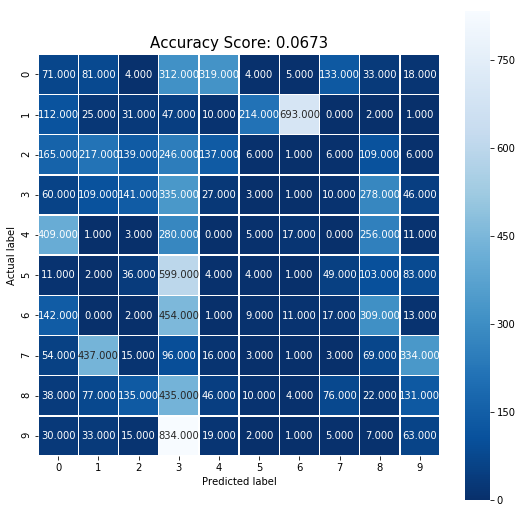

In [0]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(labels_test, predict_test)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

Visualization of results

In [0]:
images = []
orig_labels=[]
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
  # classify the clothing
  test_img = (X_test[i])
  H1 = feature.hog(test_img, orientations=9, pixels_per_cell=(10, 10),
                  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
  pred = model.predict(H1.reshape(1, -1))[0]
  #prediction = model.predict(test_img.reshape(1, -1))
  label = labelNames[pred]
  orig_labels.append(labelNames[y_test[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

In [0]:
orig_labels[1]

'ankle boot'

ankle boot
shirt
dress
ankle boot


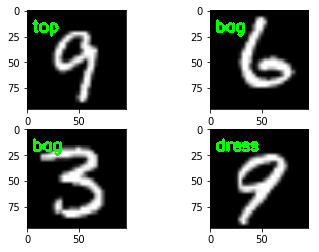

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])